In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets
import numpy as np
import matplotlib.pyplot as plt

In [63]:
# 加载手写数字数据集（MNIST）
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# 数据预处理
x_train = x_train.reshape(-1, 28, 28, 1)[:1000].astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1)[:1000].astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train)[:1000]
y_test = keras.utils.to_categorical(y_test)[:1000]

In [31]:
x_train.shape

(10000, 28, 28, 1)

In [34]:
y_train.shape

(10000, 10)

In [ ]:
class CustomOptimizer(tf.keras.optimizers.Optimizer):
    def __init__(self, learning_rate=0.001):
        super(CustomOptimizer, self).__init__()
        self.learning_rate = learning_rate

    def apply_gradients(self, grads_and_vars, name=None):
        updates = []
        for grad, var in grads_and_vars:
            if grad is not None:
                update = -self.learning_rate * grad
                var.assign_add(update)
                updates.append((var, update))
        return tf.group(*updates, name=name)

# 创建自定义优化器实例
optimizer = CustomOptimizer(learning_rate=0.001)


In [35]:
# 构建卷积神经网络模型
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])
# Flatten层的作用是将卷积层输出的形状转换为一维向量，以便后续的全连接层可以接收这个向量作为输入进行分类


# 编译模型
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# 指定优化器
# 损失函数(交叉熵)
# 评估指标(准确率)

In [46]:
# 构建卷积神经网络模型
np.random.seed(42)
model = keras.Sequential([
    keras.layers.Conv2D(8, (3, 3), input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])
# Flatten层的作用是将卷积层输出的形状转换为一维向量，以便后续的全连接层可以接收这个向量作为输入进行分类

# 编译模型
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# 指定优化器
# 损失函数(交叉熵)
# 评估指标(准确率)

In [64]:
epoch = 100
# 训练模型
# 存储训练过程中的损失值
history = model.fit(x_train, y_train, epochs=epoch, batch_size=100, validation_data=(x_test, y_test))

Epoch 1/100
10/10 [==============================] - 0s 10ms/step - loss: 0.1929 - accuracy: 0.9430 - val_loss: 0.4419 - val_accuracy: 0.8580
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.1915 - accuracy: 0.9480 - val_loss: 0.4436 - val_accuracy: 0.8600
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 0.1909 - accuracy: 0.9480 - val_loss: 0.4445 - val_accuracy: 0.8600
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.1906 - accuracy: 0.9470 - val_loss: 0.4437 - val_accuracy: 0.8600
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 0.1892 - accuracy: 0.9520 - val_loss: 0.4440 - val_accuracy: 0.8580
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.1879 - accuracy: 0.9510 - val_loss: 0.4459 - val_accuracy: 0.8590
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 0.1876 - accuracy: 0.9500 - val_loss: 0.4451 - val_accuracy: 0.8600
Epoch 8/1

32/32 [==============================] - 0s 1ms/step - loss: 0.4723 - accuracy: 0.8500
Test loss: 0.47230008244514465
Test accuracy: 0.8500000238418579


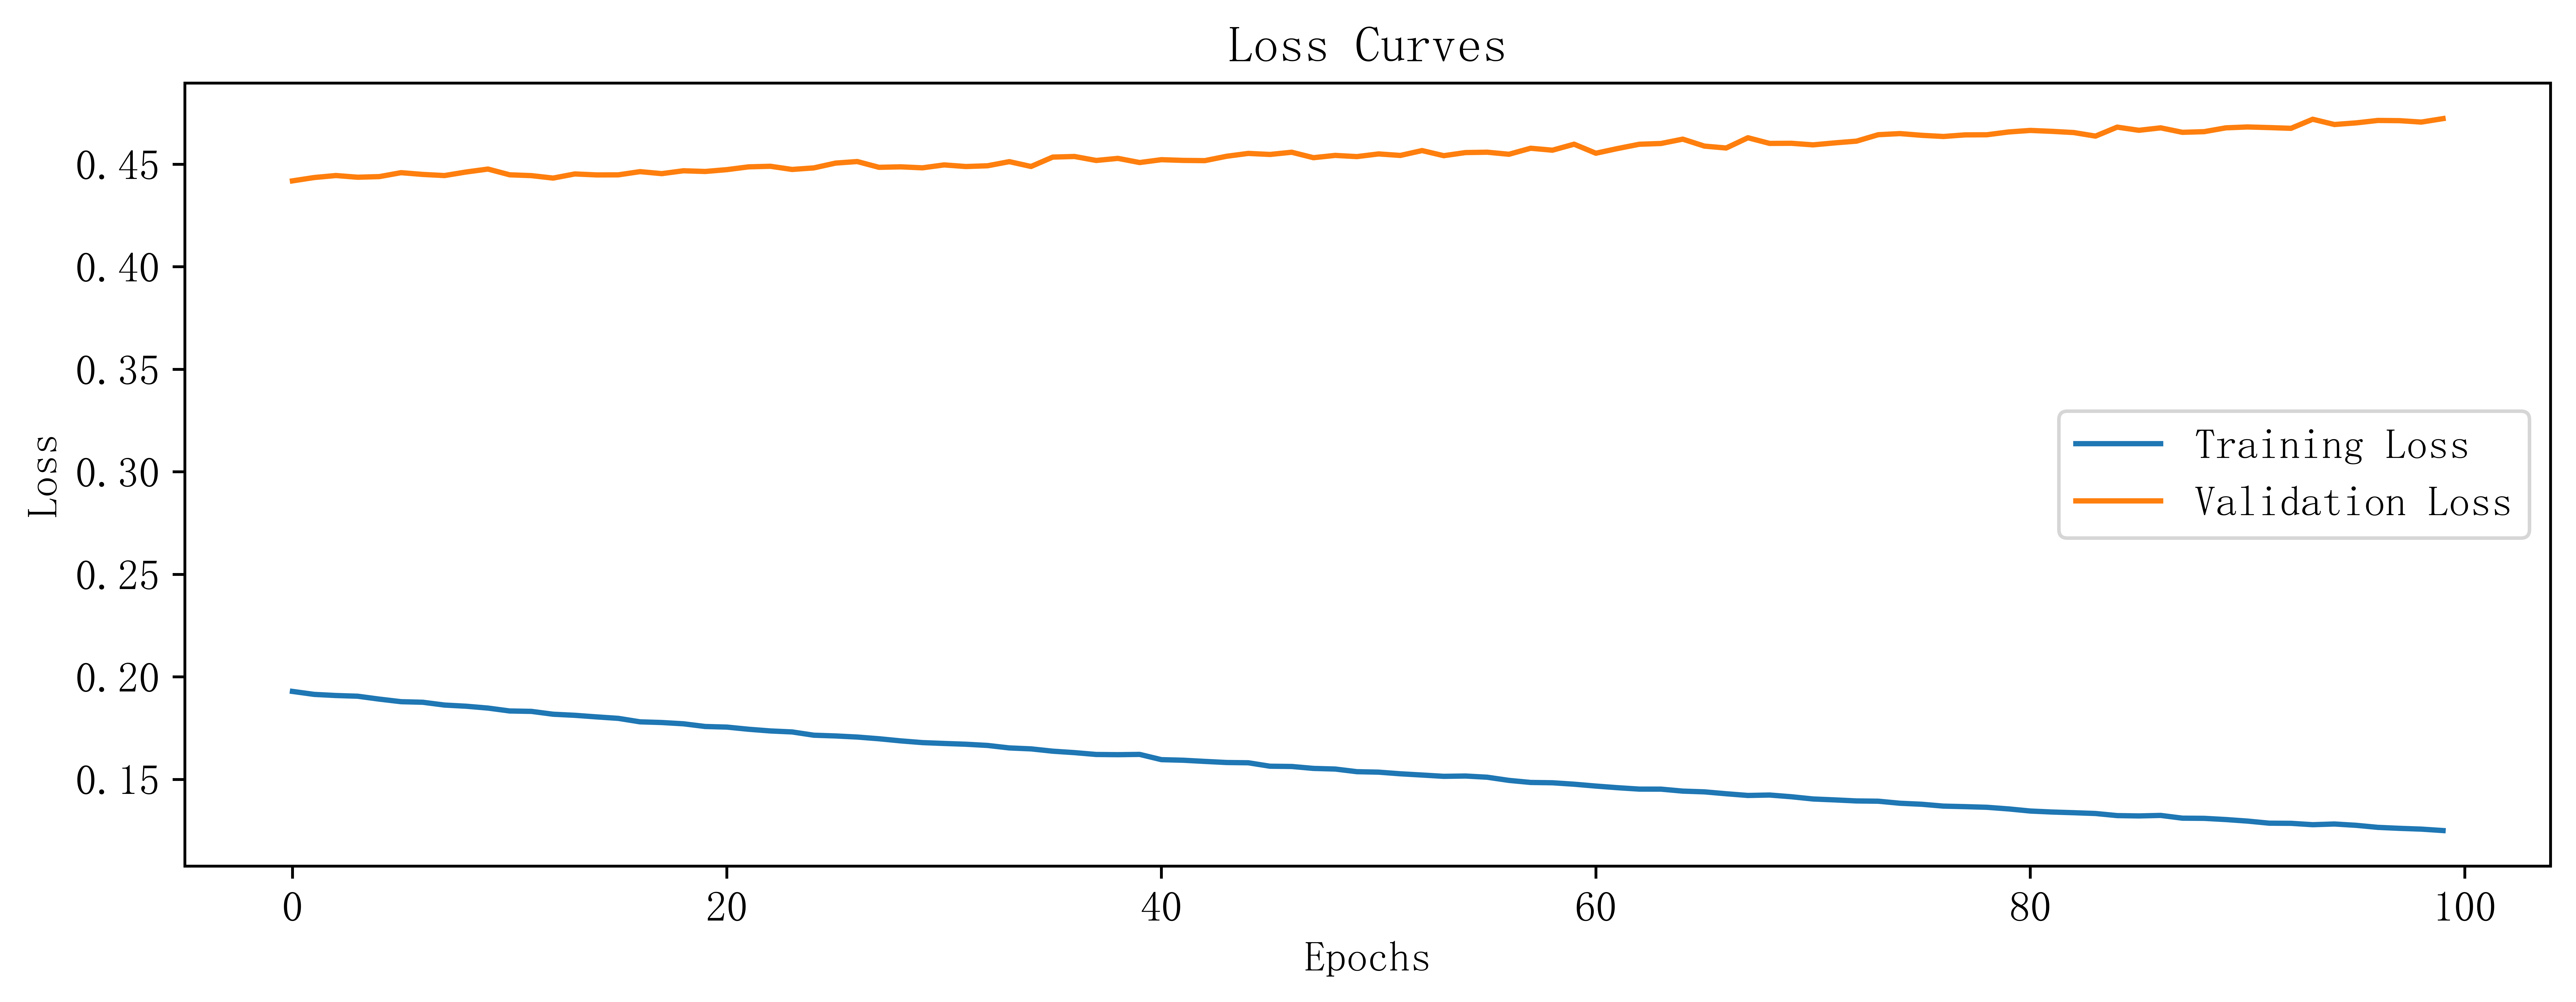

In [65]:
# 在测试集上评估模型性能
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# 图片清晰度设置
plt.figure(figsize=(12,4), dpi = 1080)

# 字体设置
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
config = {
            "font.family": 'serif',
            "font.size": 12,# 相当于小四大小
            "mathtext.fontset": 'stix',#matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
            "font.serif": ['SimSun'],#宋体
            'axes.unicode_minus': False # 处理负号，即-号
         }
plt.rcParams.update(config)

# 绘制损失曲线
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# 在上述代码中，我们创建了一个名为history的变量来存储训练过程中的损失值。
# 然后，使用plt.plot()函数绘制训练损失和验证损失曲线。最后，使用plt.show()显示损失曲线图。
# 运行以上修改后的代码，你将会看到训练过程中的损失曲线图。